In [2]:
import numpy as np
import pandas as pd
import ternary
import matplotlib as mpl
from matplotlib import rc
rc('text', usetex='False')
import matplotlib.pyplot as plt
import csv
from enum import Enum
import os


In [3]:
class Particles(Enum):
    POSITRON = "e+"
    GAMMA = "gamma"
    MUON = "mu+"
    
class Variables(Enum):
    ENERGY = "energy"
    THETA = "theta"
    PHI = "phi"
    
# data csv filepaths
filepaths = {Particles.POSITRON: '../hillas/results/simulation/cumulative_stats/e+.csv', 
             Particles.GAMMA: '../hillas/results/simulation/cumulative_stats/gamma.csv',
             Particles.MUON: '../hillas/results/simulation/cumulative_stats/mu+.csv'}

datadirs = {Particles.POSITRON: '../hillas/results/simulation/sample_stats/e+/',
            Particles.GAMMA: '../hillas/results/simulation/sample_stats/gamma/',
            Particles.MUON: '../hillas/results/simulation/sample_stats/mu+/'}

E_units = {
            'keV': 10 ** 3,
            'MeV': 10 ** 6,
            'GeV': 10 ** 9
            }

In [4]:
# Test run using averages from samples
# format: [Energy]_"theta"_[Theta]_"phi"_[Phi]_"highstats"

#old_data = np.load("gaussianpoints.npy")
#print(old_data)

#constant_variable = Variables.PHI
constant_variable = None
color_variant = Variables.THETA
marker_variant = Variables.ENERGY

constants = {Variables.PHI: None, Variables.THETA: None, Variables.ENERGY: None}

raw_data = {'energy': [],
            'theta': [],
            'phi': [],
            'p_spot': [],
            'p_track': [],
            'p_worm': []}

# particle data to process
category = Particles.MUON

# READING INDIVIDUAL RUN FILES
# EACH DATA POINT IS AN IMAGE
image_data_paths = [(datadirs[category] + path) for path in os.listdir(datadirs[category])]

for path in image_data_paths:
    
    name = path.split("/")[-1].split("_")
    
    params = {Variables.ENERGY: float(name[0][:-3]) * E_units[name[0][-3:]],
              Variables.THETA: float(name[2]), 
              Variables.PHI: float(name[4])}
    
    # indices in spreadsheet
    stats = {"p_spot":1, "p_track":2, "p_worm":3}
    
    with open(path, 'r') as datafile:
        reader = csv.reader(datafile)
        for row in reader:
            if(len(row) > 0 and not "p_spot" in row and not "" in row):
                for i in raw_data:
                        for var in Variables:
                            if(var.value == i):
                                raw_data[i].append(params[var])
                        if i in stats:
                                raw_data[i].append(float(row[stats[i]]))

df = pd.DataFrame(raw_data, columns = ['energy', 'theta', 'phi', 'p_spot', 'p_track', 'p_worm'])
print(df)
#print(df.values)
                    
# READING CUMULATIVE STATS FILE
# EACH DATA POINT IS A RUN/SAMPLE, W/ MEANS
'''
with open(filepaths[category], 'r') as datafile:
    reader = csv.reader(datafile)
    for row in reader:
        if((not 'p_spot' in row) and len(row) > 0 and not '' in row):
            name = row[0].split("_")
            
            params = {Variables.ENERGY: float(name[0][:-3]) * E_units[name[0][-3:]],
                      Variables.THETA: float(name[2]), 
                      Variables.PHI: float(name[4])}
            
            stats = {"p_spot":1, "p_track":2, "p_worm":3}
            
            if(constant_variable != None):
                if params[constant_variable] != constants[constant_variable]:
                    continue
            else:
                for i in raw_data:
                    for var in Variables:
                         if(var.value == i):
                            raw_data[i].append(params[var])
                    if i in stats:
                        raw_data[i].append(float(row[stats[i]]))

df = pd.DataFrame(raw_data, columns = ['energy', 'theta', 'phi', 'p_spot', 'p_track', 'p_worm']

'''
#print(df.values)

# TODO: the following graphs
# - all samples, with colors based on energy
# - all samples, with colors based on angle (theta, phi)
# - constant energy/angle, with colors based on the non-constant variable
# - not avgs, plot individual distributions within samples
                

            energy  theta   phi    p_spot       p_track        p_worm
0         100000.0    0.0  20.0  1.000000  4.741142e-08  5.932959e-08
1         100000.0    0.0  60.0  0.999998  1.046344e-06  1.296847e-06
2         100000.0   36.9  30.0  0.000156  9.333898e-01  6.400055e-02
3         100000.0   36.9  90.0  0.007386  5.618724e-01  4.242405e-01
4         100000.0   53.1  90.0  0.000645  5.601087e-01  3.913843e-01
...            ...    ...   ...       ...           ...           ...
53084  316000000.0   78.5  90.0  0.021173  2.092002e-01  7.373478e-01
53085  316000000.0   78.5  90.0  0.036286  8.713579e-01  8.971309e-02
53086  316000000.0   78.5  90.0  0.003358  6.311196e-02  9.331837e-01
53087  316000000.0   78.5  90.0  0.997214  8.049092e-05  2.704197e-03
53088  316000000.0   78.5  90.0  0.032903  3.618408e-02  9.301711e-01

[53089 rows x 6 columns]


'\nwith open(filepaths[category], \'r\') as datafile:\n    reader = csv.reader(datafile)\n    for row in reader:\n        if((not \'p_spot\' in row) and len(row) > 0 and not \'\' in row):\n            name = row[0].split("_")\n            \n            params = {Variables.ENERGY: float(name[0][:-3]) * E_units[name[0][-3:]],\n                      Variables.THETA: float(name[2]), \n                      Variables.PHI: float(name[4])}\n            \n            stats = {"p_spot":1, "p_track":2, "p_worm":3}\n            \n            if(constant_variable != None):\n                if params[constant_variable] != constants[constant_variable]:\n                    continue\n            else:\n                for i in raw_data:\n                    for var in Variables:\n                         if(var.value == i):\n                            raw_data[i].append(params[var])\n                    if i in stats:\n                        raw_data[i].append(float(row[stats[i]]))\n\ndf = pd.DataF

{'10keV': 10000.0, '31.6keV': 31600.0, '316keV': 316000.0, '1MeV': 1000000.0, '3.16MeV': 3160000.0, '10MeV': 10000000.0, '31.6MeV': 31600000.0, '100MeV': 100000000.0, '316MeV': 316000000.0, '1GeV': 1000000000.0, '3.16GeV': 3160000000.0, '10GeV': 10000000000.0}


c:\users\blake\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


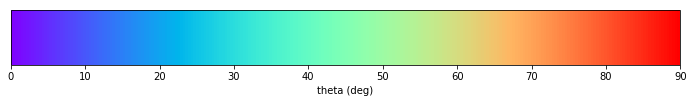

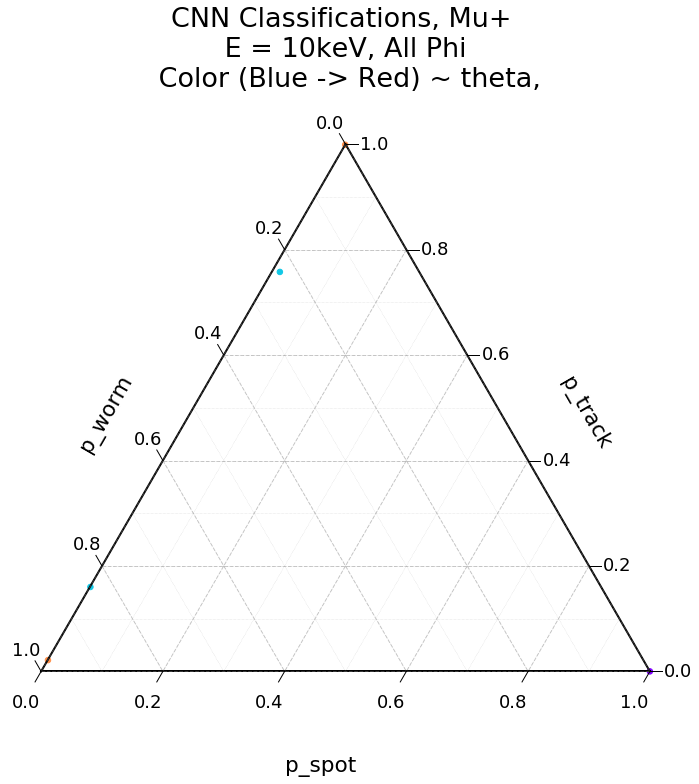

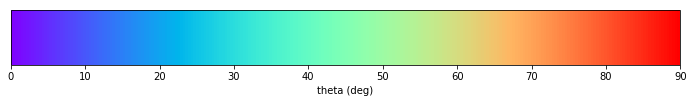

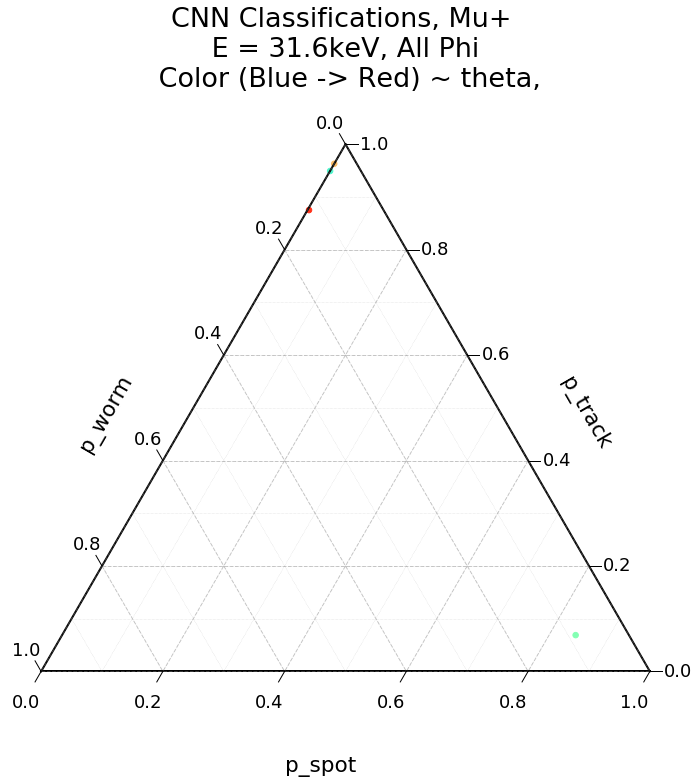

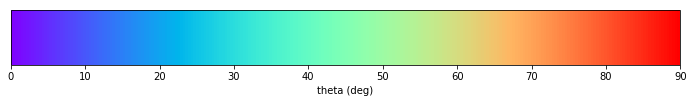

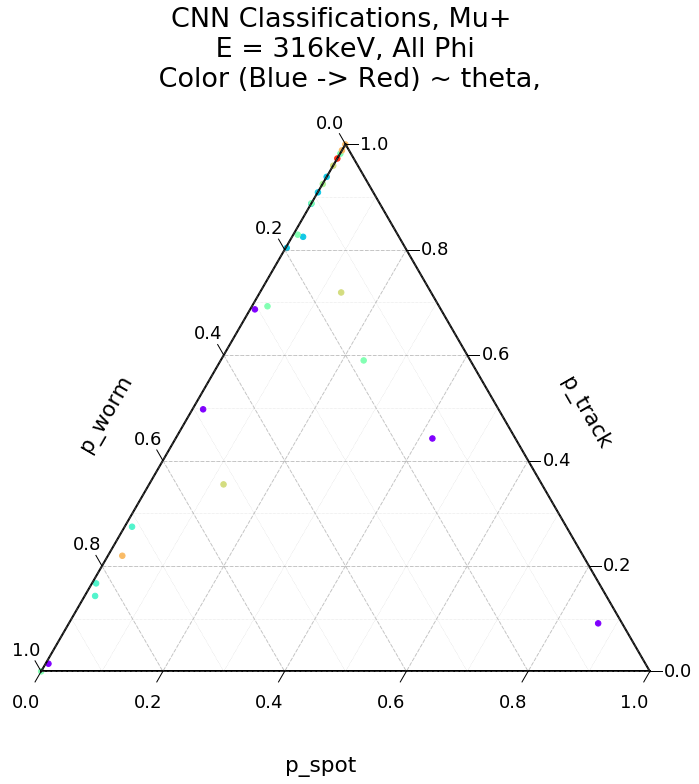

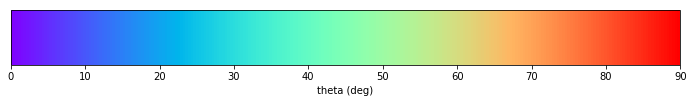

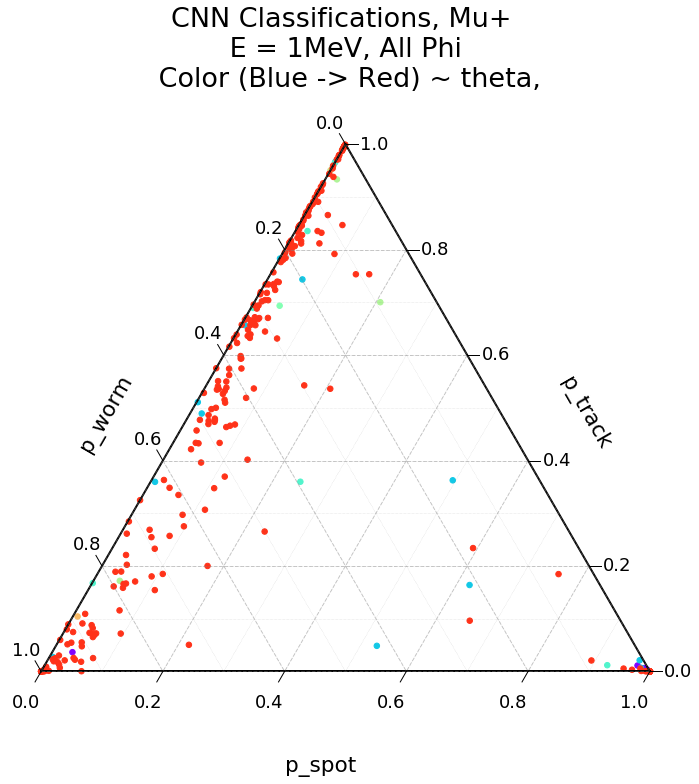

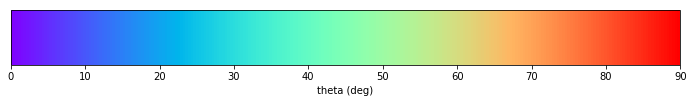

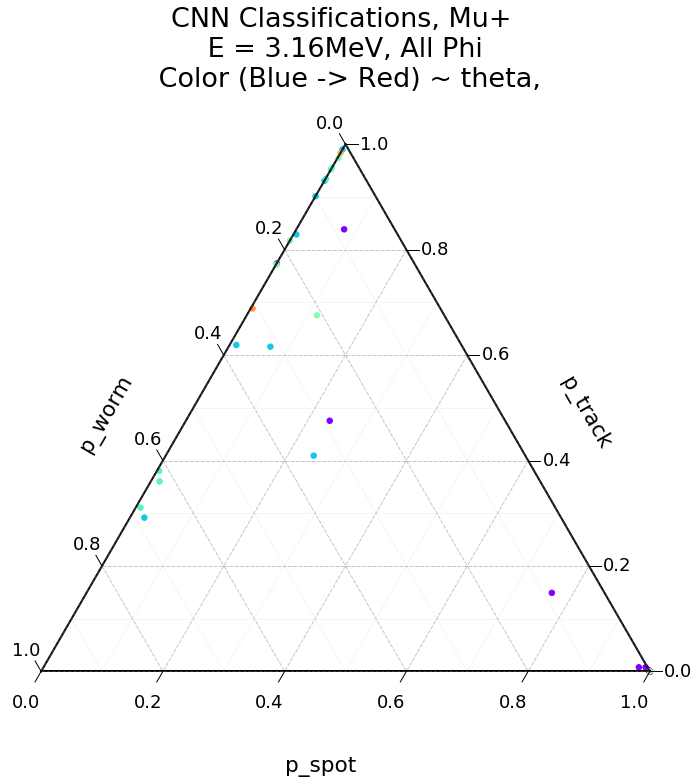

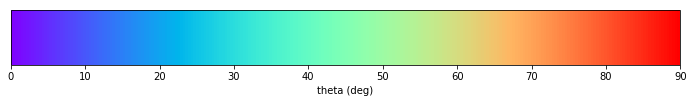

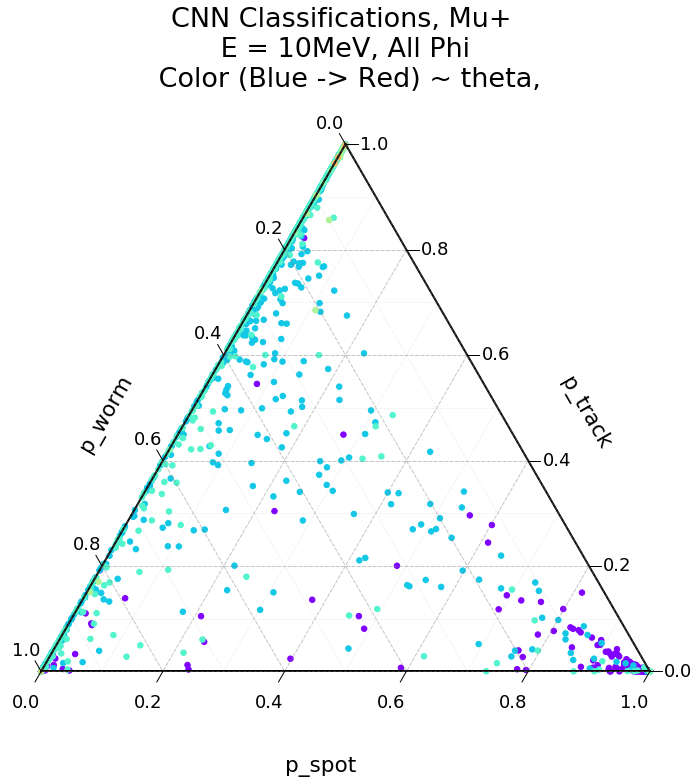

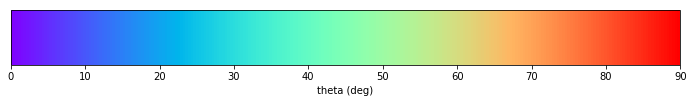

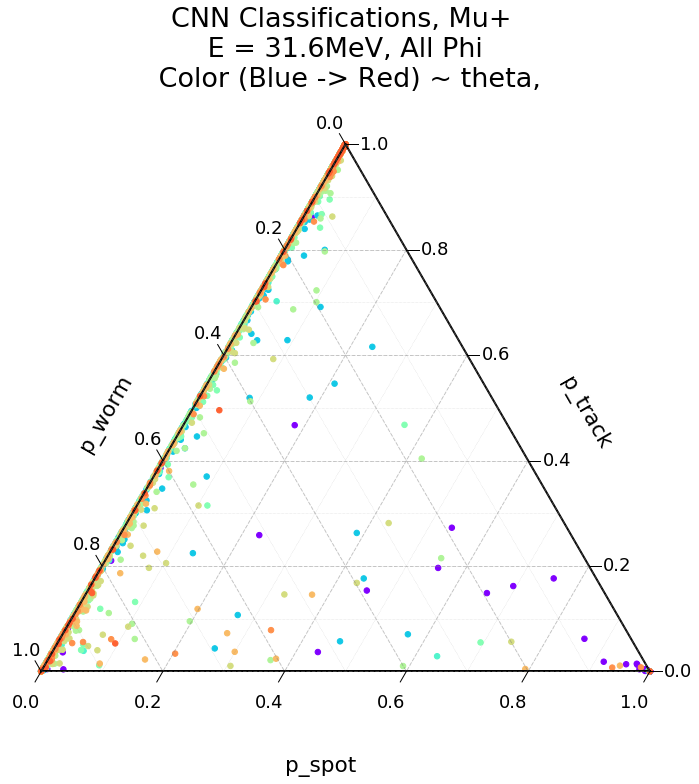

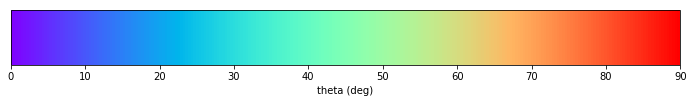

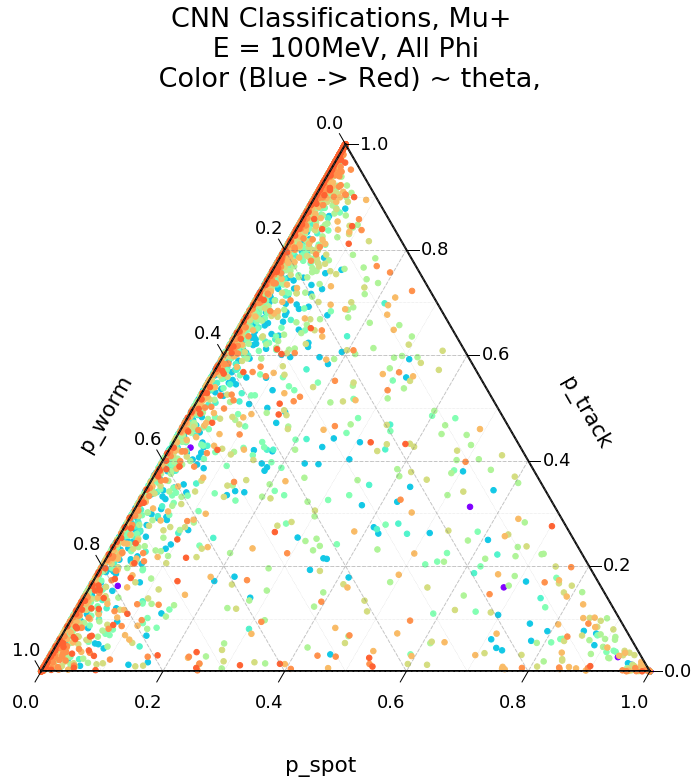

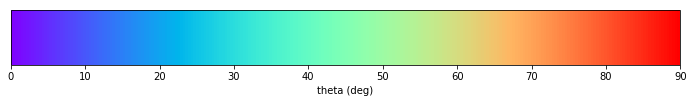

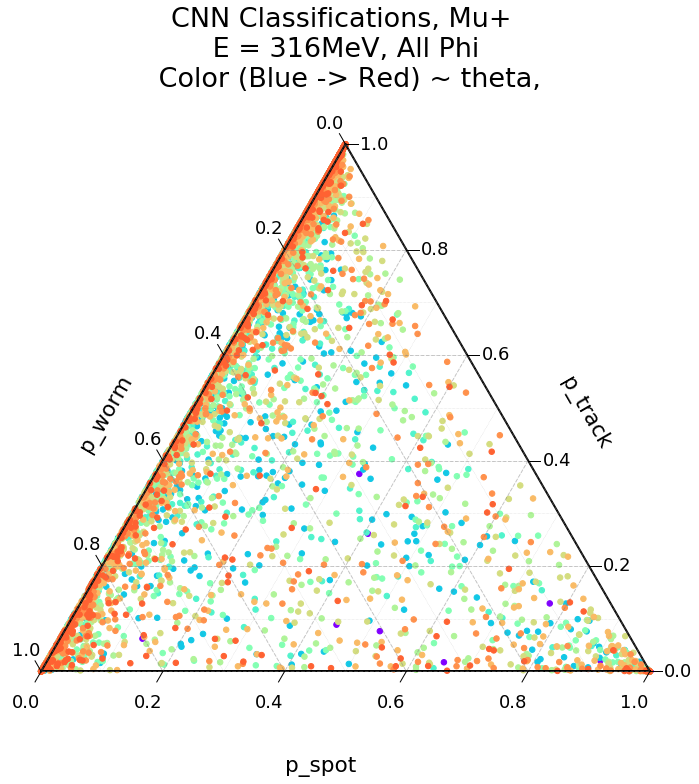

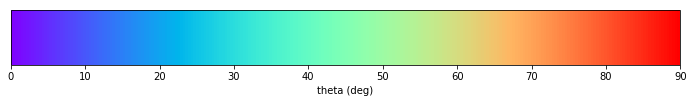

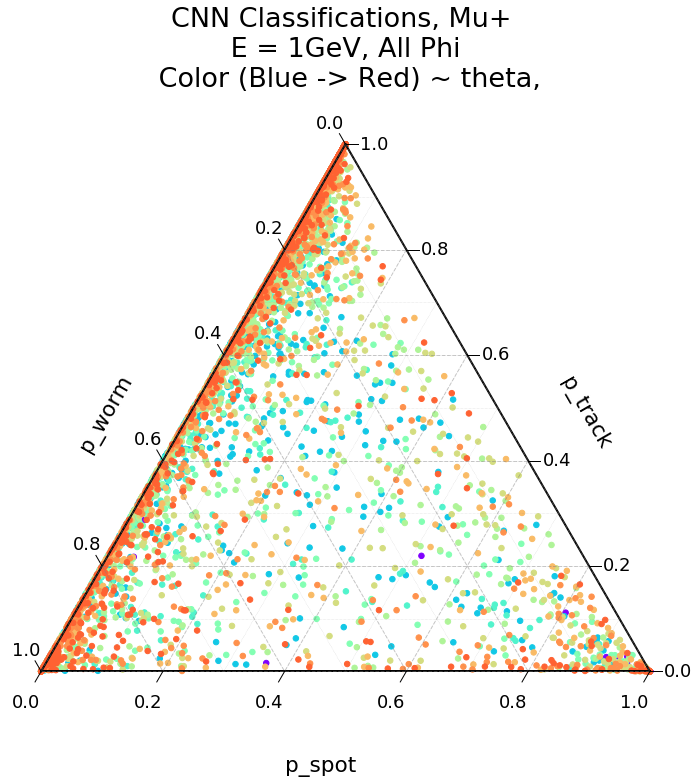

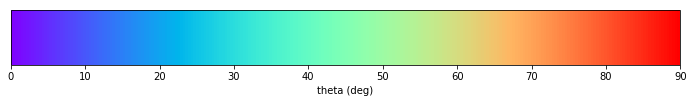

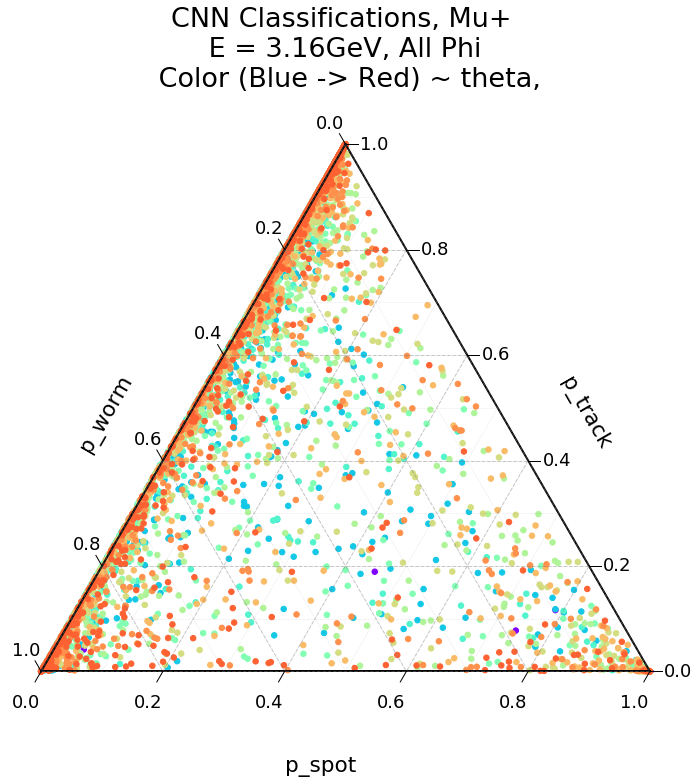

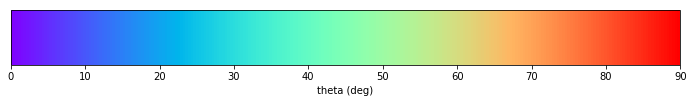

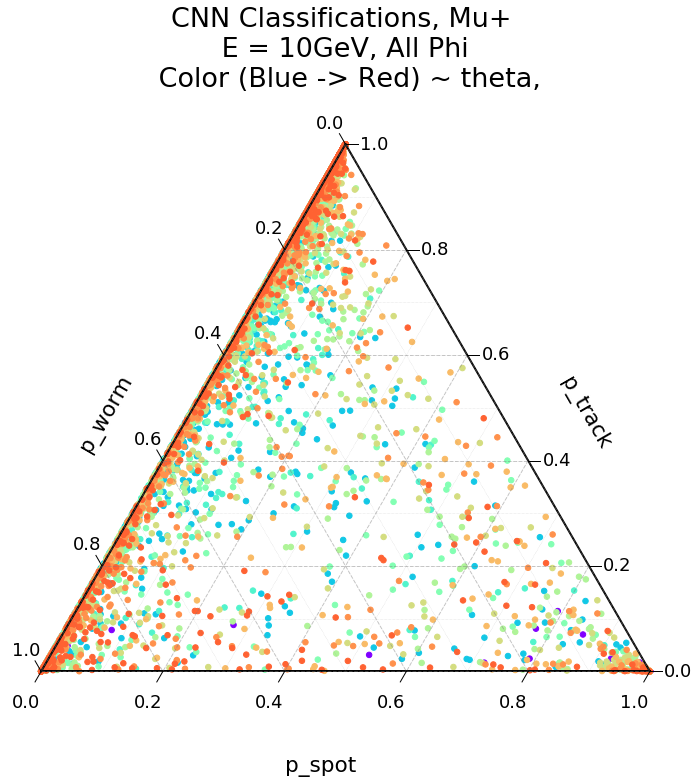

hi


In [5]:
# Using ternary out of the box
# Figure
# Figure

# plot type
color_variable = 'theta'


#Set fontsize
fontsize = 18

def tri():
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')

    # Boundary and Gridlines
    scale = 1
    fig, tax = ternary.figure(ax=ax, scale=scale)


    # Draw Boundary and Gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color='grey', multiple=scale/5., linewidth=1.0, alpha=0.4,
                  ls='--')
    tax.gridlines(color='grey', multiple=scale/10., linewidth=0.5, alpha=0.4,
                  ls=':')

    # Remove default Matplotlib Axes
    tax.get_axes().axis('off')
    tax.clear_matplotlib_ticks()

    # Set ticks
    tax.ticks(axis='lbr', multiple=scale/5., linewidth=1, offset=0.02,
              fontsize=fontsize, tick_formats='%.1f')

    # Set Axis labels and Title
    tax.set_title("Mean Classification, Mu+, All Phi \n Color (Blue -> Red) ~ log(E)", fontsize=fontsize*1.5,y=1.05)
    tax.left_axis_label("p_worm", fontsize=fontsize*1.2, rotation=60, offset=0.15
    )
    tax.right_axis_label("p_track", fontsize=fontsize*1.2, rotation=-60, offset=0.15
    )
    tax.bottom_axis_label("p_spot", fontsize=fontsize*1.2, rotation=0, offset=0.15)

    tax._redraw_labels()
    return [fig, ax, tax]

#Plot points

if(color_variable == 'theta'):

    # COLOR ~ THETA, EACH GRAPH IS A DIFFERENT ENERGY

    energy_values = ['10keV', '31.6keV', '316keV', '1MeV', '3.16MeV','10MeV', 
                     '31.6MeV', '100MeV', '316MeV', '1GeV', '3.16GeV', '10GeV', ]

    # base 10 ints corresponding to each energy value
    energy_values_nums = {val: float(val[:-3]) * E_units[val[-3:]] for val in energy_values}
    print(energy_values_nums)

    for val in energy_values:
        fig, ax = plt.subplots(figsize=(12, 2))
        fig.subplots_adjust(bottom=0.5)

        cmap = mpl.cm.rainbow
        norm = mpl.colors.Normalize(vmin=0, vmax=90)

        cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                        norm=norm,
                                        orientation='horizontal')
        cb1.set_label('theta (deg)')
        fig.show()

        fix, ax, tax = tri()
        df_e = df.loc[df['energy'] == energy_values_nums[val]]
        scat = tax.scatter(np.asarray(df_e.drop(['energy','theta','phi'], axis=1).values), marker='o', s=30, alpha=1, 

                       c = df_e['theta']/90.0,
                       cmap=plt.cm.rainbow
                      )

        tax.set_title("CNN Classifications, Mu+ \n E = " + str(val) + ", All Phi \n Color (Blue -> Red) ~ theta,", fontsize=fontsize*1.5,y=1.05)

        plt.show()
        plt.close()


# COLOR ~ ENERGY, EACH GRAPH IS DIFFERENT THETA
else:

    # each graph is a different theta
    theta_values = [0.0, 25.8, 36.9, 45.6, 53.1, 60, 66.4, 72.5, 78.5]

    # energy on a log10 scale is represented by rainbow color gradient
    for val in theta_values:
        fig, ax = plt.subplots(figsize=(12, 2))
        fig.subplots_adjust(bottom=0.5)

        cmap = mpl.cm.rainbow
        norm = mpl.colors.Normalize(vmin=4, vmax=10)

        cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                        norm=norm,
                                        orientation='horizontal')
        cb1.set_label('log10(E) [eV]')
        fig.show()

        fix, ax, tax = tri()
        df_theta = df.loc[df['theta'] == val]
        scat = tax.scatter(np.asarray(df_theta.drop(['energy','theta','phi'], axis=1).values), marker='o', s=50, alpha=1, 

                       c = ((np.log10(df_theta['energy'])-4.0) / (np.log10(df_theta['energy']).max()-4.0)),
                       cmap=plt.cm.rainbow
                      )

        tax.set_title("CNN Classifications, Mu+ \n Theta = " + str(val) + ", All Phi \n Color (Blue -> Red) ~ log(E),", fontsize=fontsize*1.5,y=1.05)

        plt.show()
        plt.close()

'''
# color as function of theta
fix, ax, tax = tri()
scat = tax.scatter(np.asarray(df.drop(['energy','theta','phi'], axis=1).values), marker='o', s=50, alpha=1, c = (df['theta']+10)/100)
plt.show()
plt.close()

fix, ax, tax = tri()

# color as function of energy
scat = tax.scatter(np.asarray(df.drop(['energy','theta','phi'], axis=1).values), marker='o', s=50, alpha=1, 
                   
                   c = ((np.log10(df['energy'])) / np.log10(df['energy']).max()),
                   #cmap=plt.cm.rainbow
                  )

#ternary.plt.show() # Can also use plt.show()
plt.show()
'''